#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading Data for a csv file

In [2]:
df = pd.read_csv('flavors_of_cacao.csv')

#### Data Exploration

In [3]:
df.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company 
(Maker-if known)           1795 non-null object
Specific Bean Origin
or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review
Date                         1795 non-null int64
Cocoa
Percent                       1795 non-null object
Company
Location                    1795 non-null object
Rating                              1795 non-null float64
Bean
Type                           1794 non-null object
Broad Bean
Origin                   1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [5]:
df.describe()

,REF,Review Date,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


#### Checking for NaN Attributes

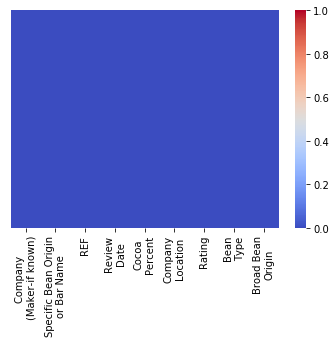

In [6]:
sns.heatmap(df.isnull(), cmap='coolwarm', yticklabels= False)


#### Checking different column names

In [7]:
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

Different Bean type and their counts

In [8]:
df['Bean\nType'].value_counts()

                            887
Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
Nacional (Arriba)             3
EET                           3
Beniano                       3
Matina                        3
Trinitario, Forastero         2
Criollo, Forastero            2
Trinitario (85% Criollo)      2
Criollo (Ocumare 61)          2
Nacional                      2
Criollo (Amarru)              2
Amazon, ICS                   2
Amazon mix                    2
Forastero (Catongo)           2
Criollo (Ocumare 77)          1
Forastero (Amelonado)         1
Criollo, +                    1
Amazon                        1
Criollo (Ocumare)             1
Blend-Forastero,Criollo       1
Foraster

Total number of Beans 

In [9]:
df['Bean\nType'].nunique()

41

Checking for correlation

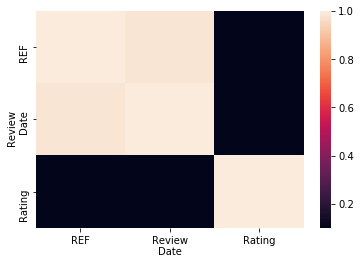

In [10]:
sns.heatmap(df.corr())

In [11]:
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

Getting Unique Values for every text related column 

In [12]:
print('Unique Values:')
print('Company (Maker-if known): ',df['Company\xa0\n(Maker-if known)'].nunique())
print('Specific Bean Origin or Bar Name: ', df['Specific Bean Origin\nor Bar Name'].nunique())
print('Company Location: ',df['Company\nLocation'].nunique())
print('Bean Type: ', df['Bean\nType'].nunique())
print('Broad Bean Origin', df['Broad Bean\nOrigin'].nunique())
print('Review Date: ', df['Review\nDate'].nunique())
print('Cocoa Percent: ', df['Cocoa\nPercent'].nunique())

Unique Values:
Company (Maker-if known):  416
Specific Bean Origin or Bar Name:  1039
Company Location:  60
Bean Type:  41
Broad Bean Origin 100
Review Date:  12
Cocoa Percent:  45


Rating Distribution

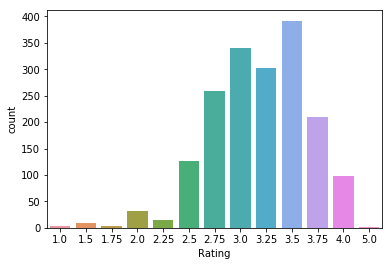

In [13]:
sns.countplot(x = df['Rating'])

About 370 ratings below to 3.5 followed by 3.0 

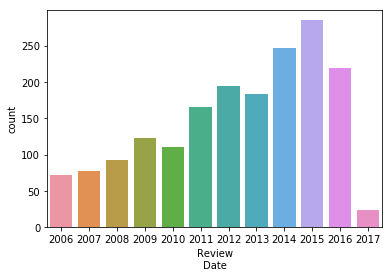

In [14]:
sns.countplot(x = df['Review\nDate'])

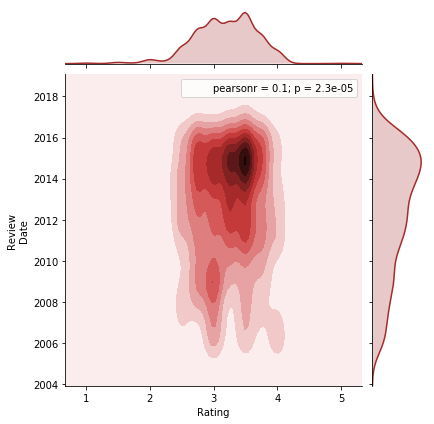

In [15]:
sns.jointplot(x = 'Rating', y= 'Review\nDate', data = df, kind='kde', color = 'brown')

In [16]:
df['Cocoa\nPercent'] = df['Cocoa\nPercent'].str.replace('%', '')
df['Cocoa\nPercent'] = df['Cocoa\nPercent'].str.replace('.', '')
df['Cocoa\nPercent'] = df['Cocoa\nPercent'].astype(int)

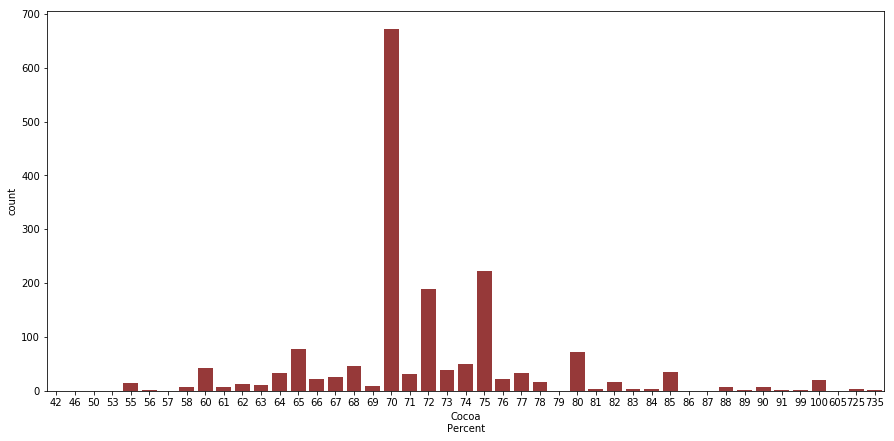

In [17]:
plt.figure(figsize=(15,7))
sns.countplot(x= 'Cocoa\nPercent', data = df, color = 'brown')

In [18]:
def normalizeIt(percent):
    if percent > 100:
        percent = int(str(percent)[:2])
    return percent

In [19]:
df['Cocoa\nPercent'] = df['Cocoa\nPercent'].apply(normalizeIt)

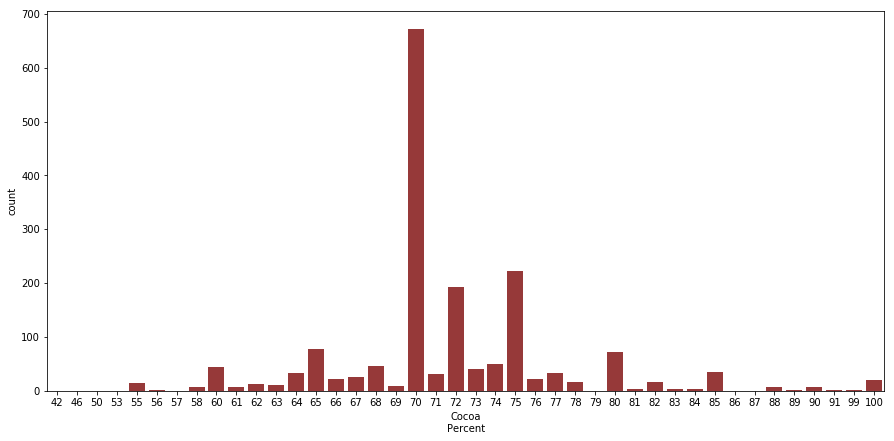

In [20]:
plt.figure(figsize=(15,7))
sns.countplot(x= 'Cocoa\nPercent', data = df, color = 'brown')

In [21]:
df['Rating'] = (df['Rating']* 100).astype(int)
df['Rating'].head(5)

0    375
1    275
2    300
3    350
4    350
Name: Rating, dtype: int32

In [22]:
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [23]:
company = pd.get_dummies(df['Company\xa0\n(Maker-if known)'],drop_first=True)
sbOrigin = pd.get_dummies(df['Specific Bean Origin\nor Bar Name'],drop_first=True)
companyLocation = pd.get_dummies(df['Company\nLocation'],drop_first=True)
bType = pd.get_dummies(df['Bean\nType'],drop_first=True)
bbOrigin = pd.get_dummies(df['Broad Bean\nOrigin'],drop_first=True)

In [24]:
df = pd.concat([df, company, sbOrigin, companyLocation, bType, bbOrigin], axis = 1)

In [25]:
df.drop(['Company\xa0\n(Maker-if known)', 'Specific Bean Origin\nor Bar Name','Company\nLocation', 'Bean\nType', 
         'Broad Bean\nOrigin'], axis = 1, inplace = True )

In [26]:
df = df.loc[:,~df.columns.duplicated()]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df.drop('Rating', axis = 1)
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
df.columns

Index(['REF', 'Review\nDate', 'Cocoa\nPercent', 'Rating', 'AMMA', 'Acalli',
       'Adi', 'Aequare (Gianduja)', 'Ah Cacao', 'Akesson's (Pralus)',
       ...
       'Ven, Trinidad, Ecuador', 'Ven., Indonesia, Ecuad.',
       'Ven., Trinidad, Mad.', 'Ven.,Ecu.,Peru,Nic.',
       'Venez,Africa,Brasil,Peru,Mex', 'Venezuela, Carribean',
       'Venezuela, Dom. Rep.', 'Venezuela, Ghana', 'Venezuela, Java',
       'Venezuela/ Ghana'],
      dtype='object', length=1574)

In [32]:
df['Venezuela'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: Venezuela, dtype: uint8

In [33]:
rfc_pred = rfc.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, accuracy_score

In [35]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

        100       0.00      0.00      0.00         2
        150       0.00      0.00      0.00         3
        175       0.00      0.00      0.00         1
        200       0.20      0.14      0.17         7
        225       0.00      0.00      0.00         1
        250       0.21      0.07      0.11        41
        275       0.23      0.24      0.23        68
        300       0.30      0.39      0.34        99
        325       0.26      0.34      0.30       100
        350       0.27      0.31      0.29       129
        375       0.06      0.03      0.04        61
        400       0.08      0.04      0.05        27

avg / total       0.23      0.25      0.23       539



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
print(accuracy_score(y_test,rfc_pred)*100)

25.2319109462


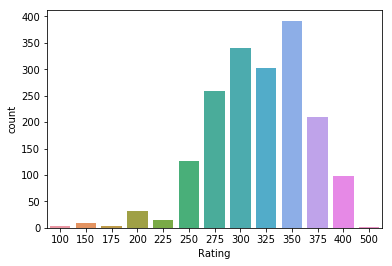

In [37]:
sns.countplot(x = 'Rating', data=df)

In [38]:
def rating_to_stars(rating):
    
    rating = int(rating)
    
    if (rating == 0.0 ):
        return 0.0
    elif (rating > 0 ) and (rating <= 199 ):
        return 1.0
    elif (rating >= 200 ) and (rating <= 299 ):
        return 2.0
    elif (rating >= 300 ) and (rating <= 399 ):
        return 3.0
    else:
        return 4.0

In [39]:
df['Rating'] = df['Rating'].apply(rating_to_stars)

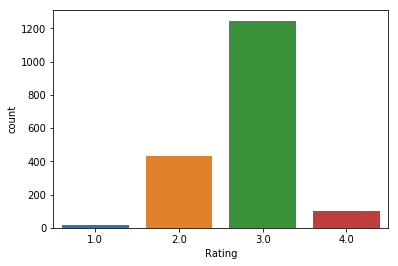

In [40]:
sns.countplot(x = 'Rating', data=df)

In [43]:
X = df.drop('Rating', axis = 1)
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [44]:
rfc = RandomForestClassifier(n_estimators=5000, min_weight_fraction_leaf= 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0, n_estimators=5000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
rfc_pred = rfc.predict(X_test)

In [46]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         6
        2.0       0.63      0.15      0.24       117
        3.0       0.74      0.97      0.84       389
        4.0       0.33      0.04      0.07        27

avg / total       0.69      0.74      0.66       539



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
from sklearn.metrics import accuracy_score

In [48]:
print(accuracy_score(y_test,rfc_pred)*100)

73.6549165121
